In [7]:
import pandas as pd
import quandl


In [8]:
start = pd.to_datetime('2014-01-01')
end = pd.to_datetime('2018-01-01')


In [9]:
aapl = quandl.get('WIKI/AAPL.11', start_date = start, end_date=end)
cisco = quandl.get('WIKI/CSCO.11', start_date = start, end_date=end)
ibm = quandl.get('WIKI/IBM.11', start_date = start, end_date=end)
amzn = quandl.get('WIKI/AMZN.11', start_date = start, end_date=end)
goog = quandl.get('WIKI/GOOGL.11', start_date = start, end_date=end)

In [10]:
aapl

,Adj. Close
Date,
2014-01-02,73.523423
2014-01-03,71.908415
2014-01-06,72.300536
2014-01-07,71.783135
2014-01-08,72.238063
2014-01-09,71.315448
2014-01-10,70.839718
2014-01-13,71.210572
2014-01-14,72.627526


In [11]:
aapl.iloc[0]['Adj. Close']

73.523423281972001

In [12]:
for stock_df in (aapl, cisco, ibm, amzn,goog):
    stock_df['Normed Return'] = stock_df['Adj. Close'] / stock_df.iloc[0]['Adj. Close']

In [13]:
aapl.head()

,Adj. Close,Normed Return
Date,,
2014-01-02,73.523423,1.000000
2014-01-03,71.908415,0.978034
2014-01-06,72.300536,0.983367
2014-01-07,71.783135,0.976330
2014-01-08,72.238063,0.982518


In [14]:
aapl.tail()

,Adj. Close,Normed Return
Date,,
2017-12-22,175.01,2.380330
2017-12-26,170.57,2.319941
2017-12-27,170.60,2.320349
2017-12-28,171.08,2.326878
2017-12-29,169.23,2.301715


In [11]:
#30% in apple
#20% in Cisco
#20% in Amazon
#10% in IBM
#20% in GOOGLE

In [15]:
for stock_df , allo in zip((aapl,cisco,ibm,amzn,goog),[.3,.2,.2,.1,.2]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [16]:
aapl.head()

,Adj. Close,Normed Return,Allocation
Date,,,
2014-01-02,73.523423,1.000000,0.300000
2014-01-03,71.908415,0.978034,0.293410
2014-01-06,72.300536,0.983367,0.295010
2014-01-07,71.783135,0.976330,0.292899
2014-01-08,72.238063,0.982518,0.294755


In [17]:
for stock_df in (aapl,cisco,ibm,amzn,goog):
    stock_df['Position Values'] = stock_df['Allocation']*1000000

In [18]:
aapl.head()

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2014-01-02,73.523423,1.000000,0.300000,300000.000000
2014-01-03,71.908415,0.978034,0.293410,293410.229060
2014-01-06,72.300536,0.983367,0.295010,295010.214597
2014-01-07,71.783135,0.976330,0.292899,292899.047240
2014-01-08,72.238063,0.982518,0.294755,294755.301647


In [19]:
all_pos_vals = [aapl['Position Values'], cisco['Position Values'], ibm['Position Values'], amzn['Position Values'], goog['Position Values']]

portfolio_va = pd.concat(all_pos_vals, axis=1)

In [20]:
portfolio_va.head()

,Position Values,Position Values,Position Values,Position Values,Position Values
Date,,,,,
2014-01-02,300000.000000,200000.000000,200000.000000,100000.000000,200000.000000
2014-01-03,293410.229060,199818.181818,201196.571983,99615.548911,198541.037804
2014-01-06,295010.214597,200090.909091,200506.656605,98909.465538,200754.635619
2014-01-07,292899.047240,202818.181818,204506.009810,100015.076513,204624.838292
2014-01-08,294755.301647,202663.636364,202630.302377,100992.537126,205050.668392


In [21]:
portfolio_va.columns = ['AAPL', 'CISCO', 'IBM', 'AMZN', 'GOOGL']

In [22]:
portfolio_va.head()

,AAPL,CISCO,IBM,AMZN,GOOGL
Date,,,,,
2014-01-02,300000.000000,200000.000000,200000.000000,100000.000000,200000.000000
2014-01-03,293410.229060,199818.181818,201196.571983,99615.548911,198541.037804
2014-01-06,295010.214597,200090.909091,200506.656605,98909.465538,200754.635619
2014-01-07,292899.047240,202818.181818,204506.009810,100015.076513,204624.838292
2014-01-08,294755.301647,202663.636364,202630.302377,100992.537126,205050.668392


In [23]:
portfolio_va['Total Pos'] = portfolio_va.sum(axis=1)

In [24]:
portfolio_va.head()

,AAPL,CISCO,IBM,AMZN,GOOGL,Total Pos
Date,,,,,,
2014-01-02,300000.000000,200000.000000,200000.000000,100000.000000,200000.000000,1.000000e+06
2014-01-03,293410.229060,199818.181818,201196.571983,99615.548911,198541.037804,9.925816e+05
2014-01-06,295010.214597,200090.909091,200506.656605,98909.465538,200754.635619,9.952719e+05
2014-01-07,292899.047240,202818.181818,204506.009810,100015.076513,204624.838292,1.004863e+06
2014-01-08,294755.301647,202663.636364,202630.302377,100992.537126,205050.668392,1.006092e+06


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

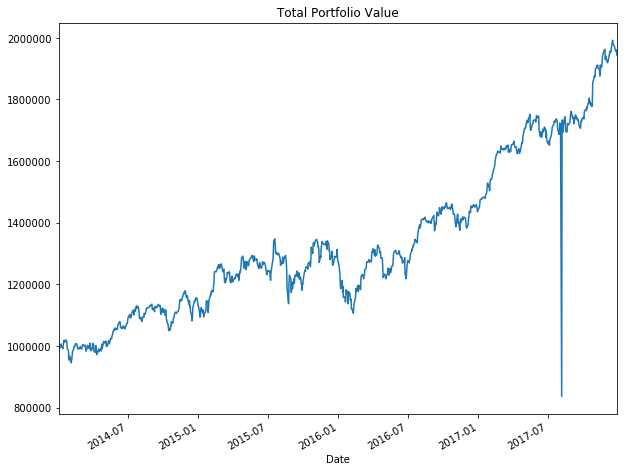

In [27]:
portfolio_va['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')

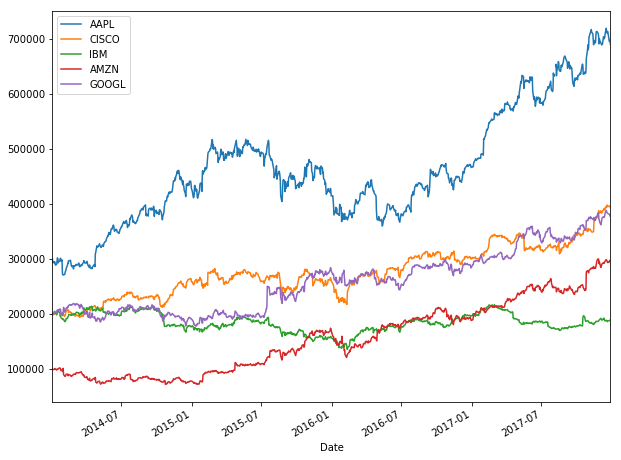

In [28]:
portfolio_va.drop('Total Pos',axis=1).plot(figsize=(10,8))

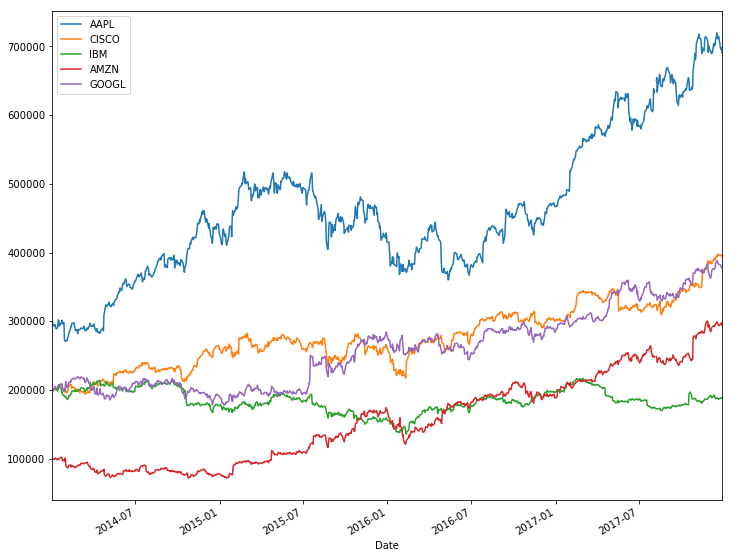

In [29]:
portfolio_va.drop('Total Pos',axis=1).plot(figsize=(12,10))

In [30]:
portfolio_va.head()

,AAPL,CISCO,IBM,AMZN,GOOGL,Total Pos
Date,,,,,,
2014-01-02,300000.000000,200000.000000,200000.000000,100000.000000,200000.000000,1.000000e+06
2014-01-03,293410.229060,199818.181818,201196.571983,99615.548911,198541.037804,9.925816e+05
2014-01-06,295010.214597,200090.909091,200506.656605,98909.465538,200754.635619,9.952719e+05
2014-01-07,292899.047240,202818.181818,204506.009810,100015.076513,204624.838292,1.004863e+06
2014-01-08,294755.301647,202663.636364,202630.302377,100992.537126,205050.668392,1.006092e+06


In [31]:
portfolio_va['Daily Return'] = portfolio_va['Total Pos'].pct_change(1)

In [32]:
portfolio_va.head()

,AAPL,CISCO,IBM,AMZN,GOOGL,Total Pos,Daily Return
Date,,,,,,,
2014-01-02,300000.000000,200000.000000,200000.000000,100000.000000,200000.000000,1.000000e+06,NaN
2014-01-03,293410.229060,199818.181818,201196.571983,99615.548911,198541.037804,9.925816e+05,-0.007418
2014-01-06,295010.214597,200090.909091,200506.656605,98909.465538,200754.635619,9.952719e+05,0.002710
2014-01-07,292899.047240,202818.181818,204506.009810,100015.076513,204624.838292,1.004863e+06,0.009637
2014-01-08,294755.301647,202663.636364,202630.302377,100992.537126,205050.668392,1.006092e+06,0.001223


In [33]:
portfolio_va['Daily Return'].mean()

0.0012604118581250098

In [34]:
portfolio_va['Daily Return'].std()

0.038834761152907724

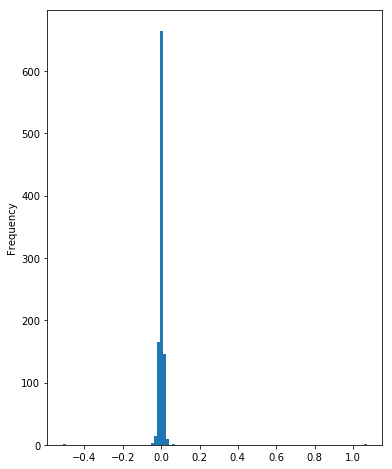

In [39]:
portfolio_va['Daily Return'].plot(kind='hist',bins=100, figsize=(6,8))

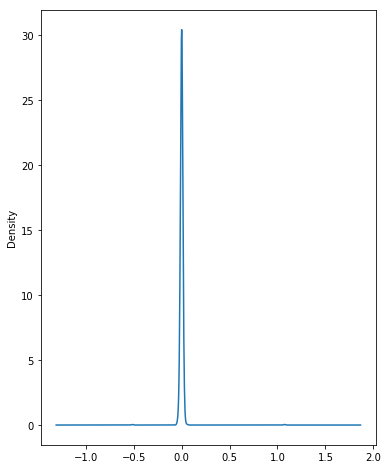

In [40]:
portfolio_va['Daily Return'].plot(kind='kde', figsize=(6,8))

In [41]:
cumulative_return = 100 * (portfolio_va['Total Pos'][-1]/portfolio_va['Total Pos'][0]-1)

In [42]:
cumulative_return

94.417921039207229

In [43]:
portfolio_va['Total Pos'][-1]

1944179.2103920723

In [44]:
SR = portfolio_va['Daily Return'].mean()/portfolio_va['Daily Return'].std()

In [45]:
SR

0.03245576439011103

In [46]:
ASR = (252**0.5) * SR

In [47]:
ASR

0.5152192871204383